
<h1><font color='yellow'>HR Employee Attrition Prediction</font><h1>

<h5>A Machine Learning Model to predict if a customer in a certain company is going to leave the organization or not.<h5>

In [3]:
#import the needed librarbies
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#Read the dataset into Dataframes
emp_df=pd.read_csv('2_Data Scientist Case Study\HR-Employee-Attrition.csv');
emp_df=pd.DataFrame(emp_df,dtype='object')

In [5]:
emp_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



<h2><font color='green'>Feature Selection</font><h2>
<h4><font color='purple'>Firsty, start understanding the data and Removing Unwanted features</font><h4>

In [6]:
emp_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,...,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,43,2,3,886,3,29,5,6,1,1470,...,4,1,4,40,7,4,37,19,16,18
top,35,No,Travel_Rarely,691,Research & Development,2,3,Life Sciences,1,1,...,3,80,0,10,2,3,5,2,0,2
freq,78,1233,1043,6,961,211,572,606,1470,1,...,459,1470,631,202,547,893,196,372,581,344


In [7]:
emp_df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [8]:
emp_df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [9]:
emp_df=emp_df.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'])

#view the Dataset after removing un-needed features in this study
emp_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


<h4><font color='purple'>Plot the data to understand data correlation and distribution</font><h4>

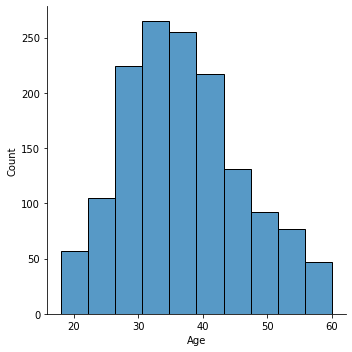

In [10]:

sns.displot(emp_df,x="Age",bins=10)

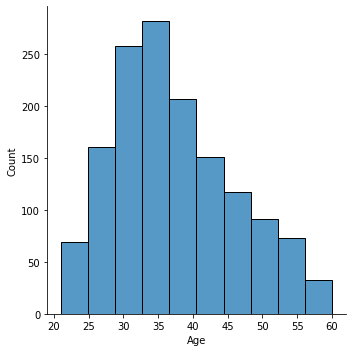

In [11]:
emp_df = emp_df.loc[emp_df["Age"] > 20]

sns.displot(emp_df,x="Age",bins=10)

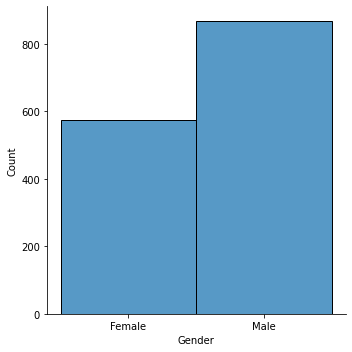

In [12]:
sns.displot(emp_df,x="Gender",bins=2)

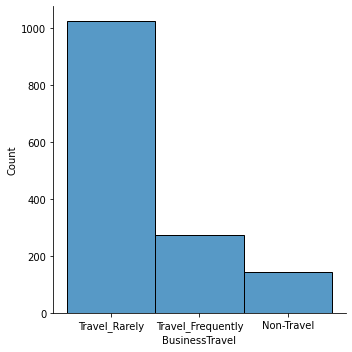

In [13]:
sns.displot(emp_df,x="BusinessTravel",bins=3)

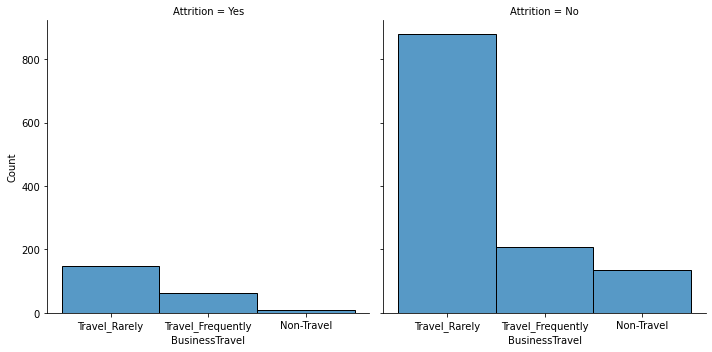

In [14]:
sns.displot(emp_df,x="BusinessTravel",bins=3,col='Attrition')

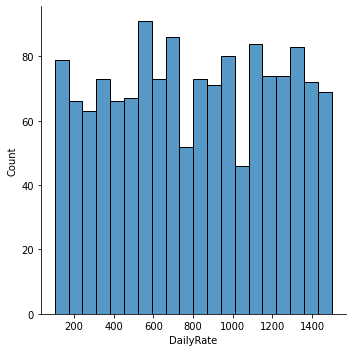

In [15]:
sns.displot(emp_df,x="DailyRate",bins=20)

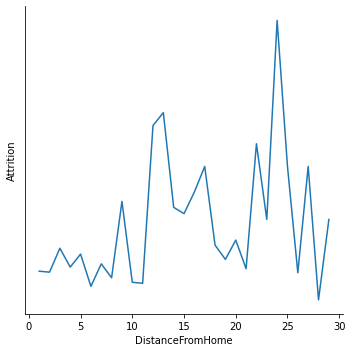

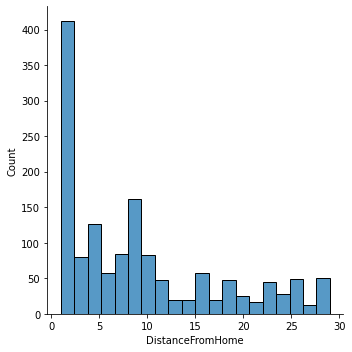

In [16]:
sns.relplot(data=emp_df,x="DistanceFromHome",y='Attrition',ci=None,kind='line')
sns.displot(emp_df,x="DistanceFromHome",bins=20)

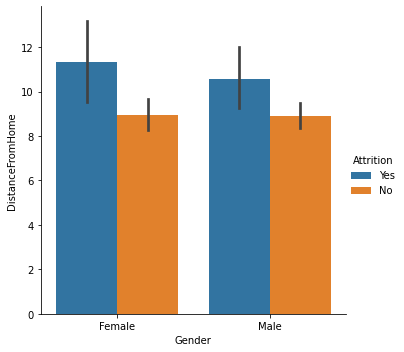

In [17]:
sns.catplot(data=emp_df,x="Gender",y='DistanceFromHome',hue='Attrition',kind='bar')

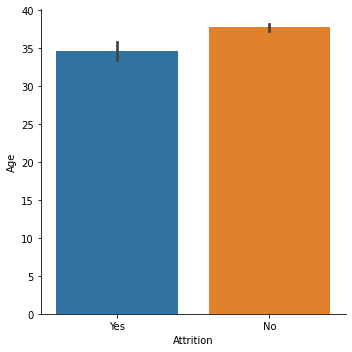

In [18]:
sns.catplot(data=emp_df,x="Attrition",y='Age',kind='bar')

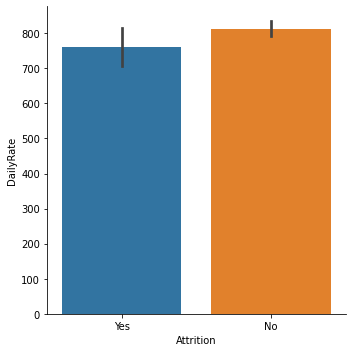

In [19]:
sns.catplot(data=emp_df,x="Attrition",y='DailyRate',kind='bar')

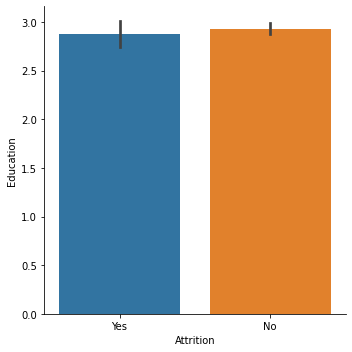

In [20]:
sns.catplot(data=emp_df,x="Attrition",y='Education',kind='bar')

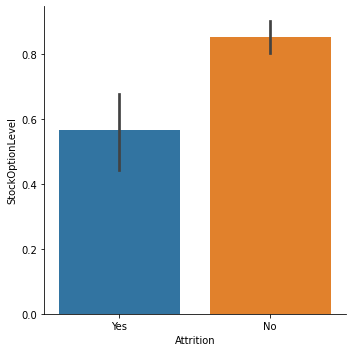

In [21]:
sns.catplot(data=emp_df,x="Attrition",y='StockOptionLevel',kind='bar')

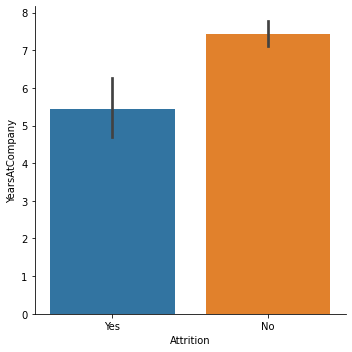

In [22]:
sns.catplot(data=emp_df,x="Attrition",y='YearsAtCompany',kind='bar')

In [23]:
pd.crosstab(np.array(emp_df['Education']),np.array(emp_df['EducationField']),normalize='index')

col_0,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
row_0,,,,,,
1,0.012195,0.402439,0.079268,0.365854,0.030488,0.109756
2,0.007194,0.410072,0.086331,0.352518,0.068345,0.075540
3,0.028881,0.407942,0.101083,0.319495,0.041516,0.101083
4,0.012563,0.434673,0.130653,0.261307,0.082915,0.077889
5,0.041667,0.354167,0.208333,0.312500,0.020833,0.062500


In [24]:
pd.crosstab(np.array(emp_df['Department']),np.array(emp_df['EducationField']),normalize='index')

col_0,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
row_0,,,,,,
Human Resources,0.435484,0.258065,0.000000,0.209677,0.048387,0.048387
Research & Development,0.000000,0.456085,0.000000,0.377778,0.067725,0.098413
Sales,0.000000,0.342529,0.356322,0.193103,0.032184,0.075862


In [25]:
pd.crosstab(np.array(emp_df['Gender']),np.array(emp_df['BusinessTravel']),normalize='index')

col_0,Non-Travel,Travel_Frequently,Travel_Rarely
row_0,,,
Female,0.080139,0.196864,0.722997
Male,0.114055,0.183180,0.702765


In [26]:
emp_df=emp_df.drop(columns=['EducationField'])

#view the Dataset after removing un-needed features in this study
emp_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [27]:

emp_df=emp_df.drop(columns=['BusinessTravel','HourlyRate','PerformanceRating'])

In [28]:

emp_df[['MonthlyIncome','JobLevel','TotalWorkingYears']].groupby('JobLevel').mean()

,MonthlyIncome,TotalWorkingYears
JobLevel,,
1,2824.349515,6.163107
2,5502.277154,10.423221
3,9817.252294,15.119266
4,15503.783019,25.471698
5,19191.826087,26.376812


In [29]:
emp_df=emp_df.drop(columns=['JobLevel'])

In [30]:
emp_df[['YearsWithCurrManager','YearsInCurrentRole','YearsAtCompany','YearsSinceLastPromotion']].groupby('YearsSinceLastPromotion').mean()

,YearsWithCurrManager,YearsInCurrentRole,YearsAtCompany
YearsSinceLastPromotion,,,
0,2.733453,2.656530,4.547406
1,3.662890,3.830028,6.243626
2,3.184713,3.216561,4.815287
3,5.980769,6.538462,11.211538
4,6.901639,6.967213,11.229508
5,7.977778,9.066667,12.044444
6,7.375000,8.031250,11.687500
7,6.407895,5.973684,8.644737
8,7.444444,8.055556,10.833333


Text(0, 0.5, 'Average MonthlyIncome')

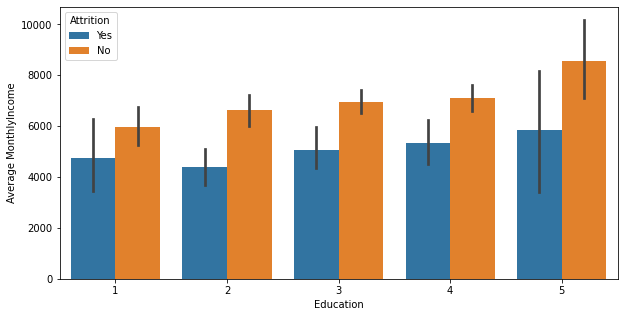

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x="Education", y="MonthlyIncome" ,hue="Attrition", data=emp_df)
plt.xlabel("Education")
plt.ylabel("Average MonthlyIncome")

In [32]:
emp_df=emp_df.drop(columns=['YearsInCurrentRole'])

In [33]:
#view the Dataset after removing un-needed features in this study
emp_df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,Sales,1,2,2,Female,3,Sales Executive,...,Yes,11,1,0,8,0,1,6,0,5
1,49,No,279,Research & Development,8,1,3,Male,2,Research Scientist,...,No,23,4,1,10,3,3,10,1,7
2,37,Yes,1373,Research & Development,2,2,4,Male,2,Laboratory Technician,...,Yes,15,2,0,7,3,3,0,0,0
3,33,No,1392,Research & Development,3,4,4,Female,3,Research Scientist,...,Yes,11,3,0,8,3,3,8,3,0
4,27,No,591,Research & Development,2,1,1,Male,3,Laboratory Technician,...,No,12,4,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,Research & Development,23,2,3,Male,4,Laboratory Technician,...,No,17,3,1,17,3,3,5,0,3
1466,39,No,613,Research & Development,6,1,4,Male,2,Healthcare Representative,...,No,15,1,1,9,5,3,7,1,7
1467,27,No,155,Research & Development,4,3,2,Male,4,Manufacturing Director,...,Yes,20,2,1,6,0,3,6,0,3
1468,49,No,1023,Sales,2,3,4,Male,2,Sales Executive,...,No,14,4,0,17,3,2,9,0,8



<h2><font color='green'>Feature Extraction</font><h2>

In [34]:
enc=OrdinalEncoder()


In [35]:
#view the columns of the dataframes after dimensional Reduction
emp_df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

convert the feature values to numerical values as a preprocessing step for Feature Extraction Algorithms and Machine Learning

In [36]:
enc.fit(emp_df[['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']])

OrdinalEncoder()

In [37]:
emp_df[['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']] = enc.transform(emp_df[['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']])

In [38]:
#view features after convertion into numerical values
emp_df.head(5)

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,20.0,1.0,618.0,2.0,0.0,1.0,1.0,0.0,2.0,7.0,...,1.0,0.0,0.0,0.0,8.0,0.0,0.0,6,0.0,5.0
1,28.0,0.0,111.0,1.0,7.0,0.0,2.0,1.0,1.0,6.0,...,0.0,12.0,3.0,1.0,10.0,3.0,2.0,10,1.0,7.0
2,16.0,1.0,798.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,...,1.0,4.0,1.0,0.0,7.0,3.0,2.0,0,0.0,0.0
3,12.0,0.0,813.0,1.0,2.0,3.0,3.0,0.0,2.0,6.0,...,1.0,0.0,2.0,0.0,8.0,3.0,2.0,8,3.0,0.0
4,6.0,0.0,309.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,...,0.0,1.0,3.0,1.0,6.0,3.0,2.0,2,2.0,2.0


now,Create 2 arrays.
One for Independent Variables
and the other for Dependent Variable (Label)

In [39]:
Indep=emp_df.drop(columns='Attrition')
dep=emp_df['Attrition']


Split Data to Training and Testing Data for preventing overfitting

In [40]:

X_train,X_test,Y_train,Y_Test=train_test_split(Indep,dep,test_size=0.3,random_state=123)

fvalue_selector = SelectKBest(f_regression, k=5)  #select features with 5 best ANOVA F-Values
X_train_new = fvalue_selector.fit_transform(X_train, Y_train)
print(X_train.shape, X_train_new.shape)     

(1009, 24) (1009, 5)


<h4><font color='purple'>Use Pearson Algorithm to Extract the most important features for the model</font><h4>

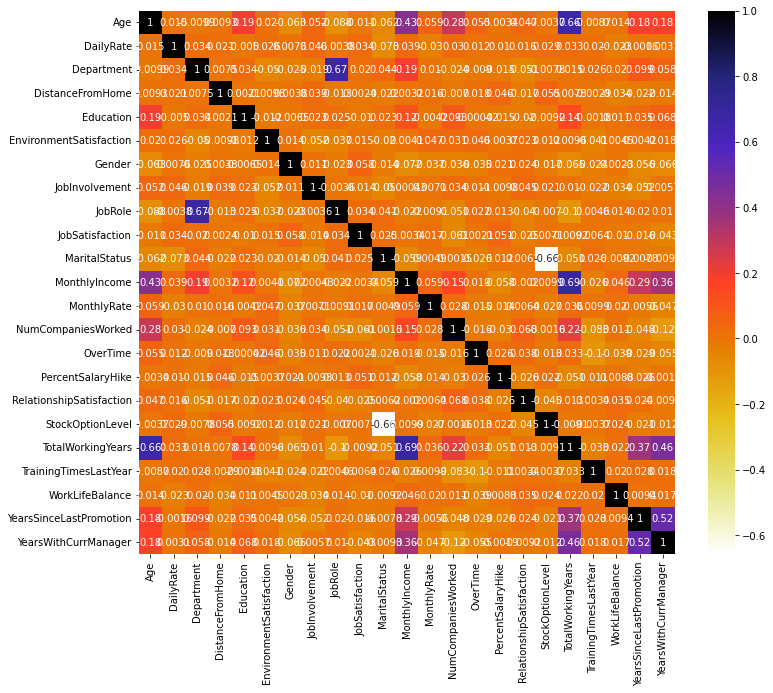

In [41]:
#use pearson correlation

plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [42]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=emp_df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] )>threshold:
                colName=corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr


In [43]:
correlation_features=correlation(X_train_new,0.65)
len(set(correlation_features))


3

In [44]:
correlation_features

{'JobRole', 'StockOptionLevel', 'TotalWorkingYears'}

<h2><font color='green'>Logistic Regresstion Model</font><h2>

In [45]:
logit_model=sm.Logit(dep.astype(float),Indep.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.312773
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.270     
Dependent Variable:    Attrition          AIC:                950.0383  
Date:                  2022-06-09 13:23   BIC:                1076.6092 
No. Observations:      1442               Log-Likelihood:     -451.02   
Df Model:              23                 LL-Null:            -617.64   
Df Residuals:          1418               LLR p-value:        8.2878e-57
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Age                      -0.0217   0.0131 -1.6493 0

In [46]:
cols= ['Age', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
        'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
        'RelationshipSatisfaction','WorkLifeBalance',
        'YearsSinceLastPromotion',
       'YearsWithCurrManager'] 
X=Indep[cols]
y=dep
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.318524
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.256     
Dependent Variable:    Attrition          AIC:                948.6227  
Date:                  2022-06-09 13:23   BIC:                1027.7295 
No. Observations:      1442               Log-Likelihood:     -459.31   
Df Model:              14                 LL-Null:            -617.64   
Df Residuals:          1427               LLR p-value:        3.9417e-59
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Age                      -0.0359   0.0112 -3.1978 0

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       362
         1.0       0.66      0.27      0.38        71

    accuracy                           0.86       433
   macro avg       0.76      0.62      0.65       433
weighted avg       0.84      0.86      0.83       433



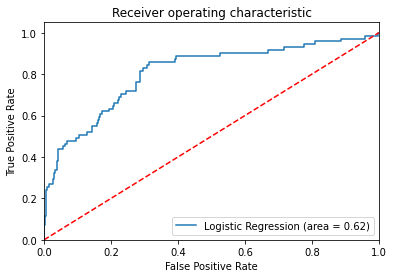

In [50]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h2><font color='green'>Random Forest Model</font><h2>

In [51]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [52]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [53]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8521939953810623


In [54]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [56]:
iris=load_iris()
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [57]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [59]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [61]:
#find important features

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [63]:

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.489470
petal width (cm)     0.387053
sepal length (cm)    0.108383
sepal width (cm)     0.015094
dtype: float64

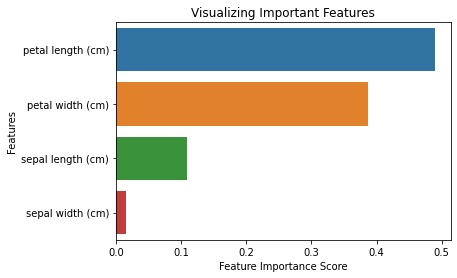

In [64]:

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [65]:
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [66]:


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523



<h1><font color='yellow'>Results</font><h1>

<h5>Two Machine learning models were applied to Predict the probability on an employee leaving the organization <h5>

<font color='purple'>Logistic regression</font> with accuracy average of 85%

<font color='purple'>Random Forest</font> with accuracy average of 95% 